In [1]:
# packaages import
import numpy as np #linear algebra
import pandas as pd #data analysis
import matplotlib.pyplot as plt # data visualisation
import seaborn as sns # advanve data visualization
from sklearn.model_selection import train_test_split  #create train and test dataset
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score  #for evaluation
from sklearn.svm import SVC
from sklearn.utils import shuffle

In [2]:
# collecting data
matches=pd.read_csv("WorldCupMatches.csv")
cups=pd.read_csv("WorldCups.csv")

In [3]:
#cleaning data
matches=matches.dropna()
cups=cups.dropna()


In [4]:
matches.tail()

Year              Datetime                     Stage  \
847  2014.0  05 Jul 2014 - 17:00             Quarter-finals   
848  2014.0  08 Jul 2014 - 17:00                Semi-finals   
849  2014.0  09 Jul 2014 - 17:00                Semi-finals   
850  2014.0  12 Jul 2014 - 17:00   Play-off for third place   
851  2014.0  13 Jul 2014 - 16:00                      Final   

                 Stadium             City Home Team Name  Home Team Goals  \
847     Arena Fonte Nova        Salvador     Netherlands              0.0   
848     Estadio Mineirao  Belo Horizonte          Brazil              1.0   
849   Arena de Sao Paulo       Sao Paulo     Netherlands              0.0   
850     Estadio Nacional        Brasilia          Brazil              0.0   
851  Estadio do Maracana  Rio De Janeiro         Germany              1.0   

     Away Team Goals Away Team Name                         Win conditions  \
847              0.0     Costa Rica  Netherlands win on penalties (4 - 3)    
848              7.0        Germany                                          
849              0.0      Argentina    Argentina win on penalties (2 - 4)    
850              3.0    Netherlands                                          
851              0.0      Argentina          Germany win after extra time    

     Attendance  Half-time Home Goals  Half-time Away Goals  \
847     51179.0                   0.0                   0.0   
848     58141.0                   0.0                   5.0   
849     63267.0                   0.0                   0.0   
850     68034.0                   0.0                   2.0   
851     74738.0                   0.0                   0.0   

                   Referee                  Assistant 1  \
847  Ravshan IRMATOV (UZB)  RASULOV Abduxamidullo (UZB)   
848  RODRIGUEZ Marco (MEX)      TORRENTERA Marvin (MEX)   
849     C�neyt �AKIR (TUR)         DURAN Bahattin (TUR)   
850  HAIMOUDI Djamel (ALG)         ACHIK Redouane (MAR)   
851   Nicola RIZZOLI (ITA)        Renato FAVERANI (ITA)   

                  Assistant 2   RoundID      MatchID Home Team Initials  \
847  KOCHKAROV Bakhadyr (KGZ)  255953.0  300186488.0                NED   
848     QUINTERO Marcos (MEX)  255955.0  300186474.0                BRA   
849         ONGUN Tarik (TUR)  255955.0  300186490.0                NED   
850   ETCHIALI Abdelhak (ALG)  255957.0  300186502.0                BRA   
851      Andrea STEFANI (ITA)  255959.0  300186501.0                GER   

    Away Team Initials  
847                CRC  
848                GER  
849                ARG  
850                NED  
851                ARG

In [5]:
cups.head()

Year      Country      Winner      Runners-Up    Third      Fourth  \
0  1930      Uruguay     Uruguay       Argentina      USA  Yugoslavia   
1  1934        Italy       Italy  Czechoslovakia  Germany     Austria   
2  1938       France       Italy         Hungary   Brazil      Sweden   
3  1950       Brazil     Uruguay          Brazil   Sweden       Spain   
4  1954  Switzerland  Germany FR         Hungary  Austria     Uruguay   

   GoalsScored  QualifiedTeams  MatchesPlayed Attendance  
0           70              13             18    590.549  
1           70              16             17    363.000  
2           84              15             18    375.700  
3           88              13             22  1.045.246  
4          140              16             26    768.607

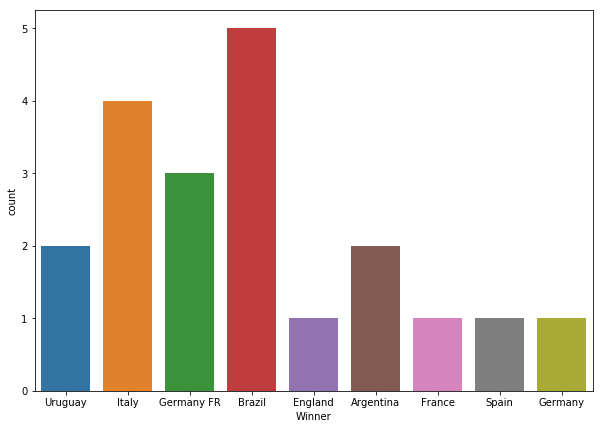

In [6]:
# no. of WC championships
plt.figure(figsize=(10,7))
sns.countplot(cups["Winner"])

In [7]:
# replace Germany DR and Germany FR by Germany
# replace sovient Union by Russia
def replace_name(df):
    if(df["Home Team Name"] in ["German DR","Germany FR"]):
        df["Home Team Name"]="Germany"
    elif(df["Home Team Name"] in ["Soviet Union"]):
        df["Home Team Name"]="Russia"
    elif(df["Away Team Name"] in ["German DR","Germany FR"]):
        df["Away Team Name"]="Germany"
    elif(df["Away Team Name"] in ["Soviet Union"]):
        df["Away Team Name"]="Russia"
    
    return df

matches =matches.apply(replace_name,axis="columns")

In [8]:
#create a dictionary of football team
team_name={}
index=0
for ind,row in matches.iterrows():
    name=row["Home Team Name"]
    if (name not in team_name.keys()):
        team_name[name]=index
        index+=1
    name=row["Away Team Name"]
    if(name not in team_name.keys()):
        team_name[name]=index
        index+=1
        
team_name

{'France': 0,
 'Mexico': 1,
 'USA': 2,
 'Belgium': 3,
 'Yugoslavia': 4,
 'Brazil': 5,
 'Romania': 6,
 'Peru': 7,
 'Argentina': 8,
 'Chile': 9,
 'Bolivia': 10,
 'Paraguay': 11,
 'Uruguay': 12,
 'Austria': 13,
 'Hungary': 14,
 'Egypt': 15,
 'Switzerland': 16,
 'Netherlands': 17,
 'Sweden': 18,
 'Germany': 19,
 'Spain': 20,
 'Italy': 21,
 'Czechoslovakia': 22,
 'Dutch East Indies': 23,
 'Cuba': 24,
 'Norway': 25,
 'Poland': 26,
 'England': 27,
 'Scotland': 28,
 'Turkey': 29,
 'Korea Republic': 30,
 'Russia': 31,
 'Wales': 32,
 'Northern Ireland': 33,
 'Colombia': 34,
 'Bulgaria': 35,
 'Korea DPR': 36,
 'Portugal': 37,
 'Soviet Union': 38,
 'Israel': 39,
 'Morocco': 40,
 'El Salvador': 41,
 'Australia': 42,
 'Zaire': 43,
 'Haiti': 44,
 'Germany FR': 45,
 'Tunisia': 46,
 'IR Iran': 47,
 'Iran': 48,
 'Cameroon': 49,
 'New Zealand': 50,
 'Algeria': 51,
 'Honduras': 52,
 'Kuwait': 53,
 'Canada': 54,
 'Iraq': 55,
 'Denmark': 56,
 'rn">United Arab Emirates': 57,
 'Costa Rica': 58,
 'rn">Republic

In [9]:
# drop unnecessary columns
#matches.columns
dropped_matches=matches.drop(['Datetime', 'Stage', 'Stadium', 'City','Win conditions', 'Attendance', 'Half-time Home Goals',
       'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2',
       'RoundID', 'MatchID','Home Team Initials', 'Away Team Initials'],axis=1)

In [10]:
dropped_matches.head()

Year Home Team Name  Home Team Goals  Away Team Goals Away Team Name
0  1930.0         France              4.0              1.0         Mexico
1  1930.0            USA              3.0              0.0        Belgium
2  1930.0     Yugoslavia              2.0              1.0         Brazil
3  1930.0        Romania              3.0              1.0           Peru
4  1930.0      Argentina              1.0              0.0         France

In [11]:
# make a series counting no. of time each team become WC champion
championships=cups['Winner'].map(lambda t :'Germany' if t=='Germany FR' else t).value_counts()
championships

Brazil       5
Germany      4
Italy        4
Argentina    2
Uruguay      2
France       1
England      1
Spain        1
Name: Winner, dtype: int64

In [12]:
# for single column--map
# for dataframe--apply

In [13]:
# append 'Home Team champions' and 'away team champions'
dropped_matches['Home Team Champions']=0
dropped_matches['Away Team Champions']=0

In [14]:
dropped_matches.head()

Year Home Team Name  Home Team Goals  Away Team Goals Away Team Name  \
0  1930.0         France              4.0              1.0         Mexico   
1  1930.0            USA              3.0              0.0        Belgium   
2  1930.0     Yugoslavia              2.0              1.0         Brazil   
3  1930.0        Romania              3.0              1.0           Peru   
4  1930.0      Argentina              1.0              0.0         France   

   Home Team Champions  Away Team Champions  
0                    0                    0  
1                    0                    0  
2                    0                    0  
3                    0                    0  
4                    0                    0

In [15]:
#fill values
def count_championship(df):
    if(championships.get(df['Home Team Name'])!=None):
        df['Home Team Champions']=championships.get(df['Home Team Name'])
        
    if(championships.get(df['Away Team Name'])!=None):
        df['Away Team Champions']=championships.get(df['Away Team Name'])   
        
    return df

matches=dropped_matches.apply(count_championship,axis=1)

In [16]:
matches.head()

Year Home Team Name  Home Team Goals  Away Team Goals Away Team Name  \
0  1930.0         France              4.0              1.0         Mexico   
1  1930.0            USA              3.0              0.0        Belgium   
2  1930.0     Yugoslavia              2.0              1.0         Brazil   
3  1930.0        Romania              3.0              1.0           Peru   
4  1930.0      Argentina              1.0              0.0         France   

   Home Team Champions  Away Team Champions  
0                    1                    0  
1                    0                    0  
2                    0                    5  
3                    0                    0  
4                    2                    1

In [17]:
# find who won : Home win :1, away win:2,draw=0
matches['Winner']="-"

In [18]:
matches.head()

Year Home Team Name  Home Team Goals  Away Team Goals Away Team Name  \
0  1930.0         France              4.0              1.0         Mexico   
1  1930.0            USA              3.0              0.0        Belgium   
2  1930.0     Yugoslavia              2.0              1.0         Brazil   
3  1930.0        Romania              3.0              1.0           Peru   
4  1930.0      Argentina              1.0              0.0         France   

   Home Team Champions  Away Team Champions Winner  
0                    1                    0      -  
1                    0                    0      -  
2                    0                    5      -  
3                    0                    0      -  
4                    2                    1      -

In [19]:
def find_winner(df):
    home_team_goal=int(df["Home Team Goals"])
    away_team_goal=int(df["Away Team Goals"])
    
    if (home_team_goal == away_team_goal):
        df["Winner"] = 0
    elif(home_team_goal > away_team_goal):
        df["Winner"]=1
    else:
        df["Winner"]=2
        
    return df

In [20]:
matches=matches.apply(find_winner,axis=1)

In [21]:
matches.head()

Year Home Team Name  Home Team Goals  Away Team Goals Away Team Name  \
0  1930.0         France              4.0              1.0         Mexico   
1  1930.0            USA              3.0              0.0        Belgium   
2  1930.0     Yugoslavia              2.0              1.0         Brazil   
3  1930.0        Romania              3.0              1.0           Peru   
4  1930.0      Argentina              1.0              0.0         France   

   Home Team Champions  Away Team Champions  Winner  
0                    1                    0       1  
1                    0                    0       1  
2                    0                    5       1  
3                    0                    0       1  
4                    2                    1       1

In [22]:
matches["Winner"].value_counts()

1    486
0    190
2    174
Name: Winner, dtype: int64

In [23]:
# replace team name by id
def replace_team_name(df):
    df["Home Team Name"] =team_name[df["Home Team Name"]]
    df["Away Team Name"] = team_name[df["Away Team Name"]]
    return df

In [24]:
matches=matches.apply(replace_team_name,axis=1)

In [25]:
matches.head()

Year  Home Team Name  Home Team Goals  Away Team Goals  Away Team Name  \
0  1930.0               0              4.0              1.0               1   
1  1930.0               2              3.0              0.0               3   
2  1930.0               4              2.0              1.0               5   
3  1930.0               6              3.0              1.0               7   
4  1930.0               8              1.0              0.0               0   

   Home Team Champions  Away Team Champions  Winner  
0                    1                    0       1  
1                    0                    0       1  
2                    0                    5       1  
3                    0                    0       1  
4                    2                    1       1

In [26]:
# drop unnecessary columns
matches=matches.drop(["Year","Home Team Goals","Away Team Goals"],axis=1)

In [27]:
matches.head()

Home Team Name  Away Team Name  Home Team Champions  Away Team Champions  \
0               0               1                    1                    0   
1               2               3                    0                    0   
2               4               5                    0                    5   
3               6               7                    0                    0   
4               8               0                    2                    1   

   Winner  
0       1  
1       1  
2       1  
3       1  
4       1

In [28]:
# append data :- simply exchange 'home team name' with 'away team name' and 'home team championship' with 'away 
# team championship'

In [29]:
x=matches.loc[:,["Home Team Name","Away Team Name","Home Team Champions","Away Team Champions"]]

x=np.array(x)
_x=x.copy()

_x[:,0]=x[:,1]
_x[:,1]=x[:,0]
_x[:,2]=x[:,3]
_x[:,3]=x[:,2]

y = matches.loc[:,["Winner"]]
y=np.array(y)
y=np.reshape(y,(1,850))
y=y[0]

_y=y.copy()

for i in range(len(_y)):
    if _y[i]==1:
        _y[i]=2
    elif _y[i]==2:
        _y[i]=1
        
x=np.concatenate((x,_x),axis=0)
y=np.concatenate((y,_y))

In [30]:
len(x)

1700

In [31]:
x


array([[ 0,  1,  1,  0],
       [ 2,  3,  0,  0],
       [ 4,  5,  0,  5],
       ...,
       [ 8, 17,  2,  0],
       [17,  5,  0,  5],
       [ 8, 19,  2,  4]], dtype=int64)

In [32]:
#shuffle
x,y=shuffle(x,y)

In [33]:
# split into test and train
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [34]:
x_train

array([[56, 12,  0,  2],
       [ 8,  3,  2,  0],
       [80, 11,  0,  0],
       ...,
       [40, 19,  0,  4],
       [21, 17,  4,  0],
       [ 3, 31,  0,  0]], dtype=int64)

In [35]:
# train by svm

In [36]:
svm_model=SVC(probability=True)

In [37]:
svm_model.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [38]:
winner_pred=svm_model.predict(x_test)

In [39]:
confusion_matrix(y_test,winner_pred)

array([[ 15,  47,  52],
       [ 16, 110,  80],
       [ 21,  54, 115]], dtype=int64)

In [40]:
accuracy_score(y_test,winner_pred)

0.47058823529411764

In [41]:
print(classification_report(y_test,winner_pred))

             precision    recall  f1-score   support

          0       0.29      0.13      0.18       114
          1       0.52      0.53      0.53       206
          2       0.47      0.61      0.53       190

avg / total       0.45      0.47      0.45       510



In [42]:
def prediction(team1,team2):
    id1=team_name[team1]
    id2=team_name[team2]
    
    championship1=championships.get(team1) if championships.get(team1)!=None else 0
    
    championship2=championships.get(team2) if championships.get(team2)!=None else 0
    
    x=np.array([id1,id2,championship1,championship2])
    x=x.reshape((1,-1))
    win_prob=svm_model.predict_proba(x)[0] 
    
    text='''Chance of {} to win {} is {}\n
           Chance of {} to win {} is {}\n
          Chance for {} to {} draw is {}'''.format(team1,team2,win_prob[1]*100,
                                                team2,team1,win_prob[2]*100,
                                                team1,team2,win_prob[0]*100)
    
    return win_prob,text

In [43]:
# framce and brazil
prob,text=prediction("Russia","Croatia")
print(text)

Chance of Russia to win Croatia is 38.84322448067775

           Chance of Croatia to win Russia is 40.228220733150266

          Chance for Russia to Croatia draw is 20.928554786171986
